In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dfu = pd.read_csv("out/exp4/u.csv", sep=" ", header=None)
u_array = dfu.to_numpy()

In [3]:
dfv = pd.read_csv("out/exp4/v.csv", sep=" ", header=None)
v_array = dfv.to_numpy()

In [4]:
rou0 = 1.225
t0 = 293.0
visc = 1.458e-6 * np.sqrt(t0 ** 3) / (t0 + 110.4)
width = 0.5
v0 = 20.0
re0 = rou0 * v0 * width / visc
blt = width * 5.2 / np.sqrt(re0)
nx = 50000
ny = 200
ymax = blt * 2.0
dy = ymax / float(ny)

In [5]:
print(u_array.shape)
boundary = np.zeros(u_array.shape[0])
for i in range(len(u_array)):
    for j in range(len(u_array[i])):
        if u_array[i, j] > 20 * 0.995:
            boundary[i] = j
            break
x = np.linspace(0, width, nx + 1)
print(boundary * dy)

(50001, 202)
[6.32552869e-05 6.32552869e-05 9.48829303e-05 ... 6.32552869e-03
 6.32552869e-03 0.00000000e+00]


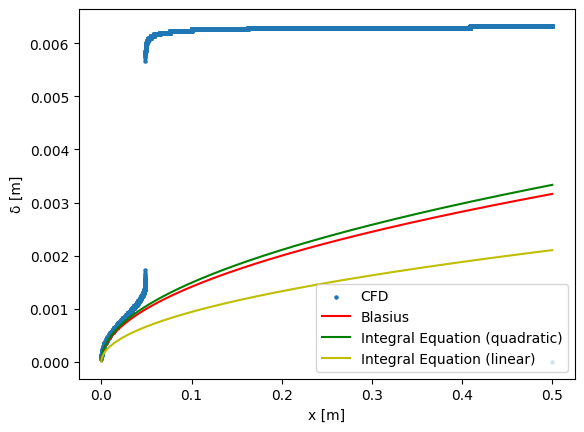

In [6]:
plt.scatter(x, boundary*dy, s=5, label="CFD")
re = rou0 * v0 * x[1:] / visc
plt.ylabel("δ [m]")
plt.xlabel("x [m]")
plt.plot(x[1:], 5.2 / np.sqrt(re) * x[1:], c = "r", label="Blasius")
plt.plot(x[1:], 5.48 / np.sqrt(re) * x[1:], c = "g", label="Integral Equation (quadratic)")
plt.plot(x[1:], 3.46 / np.sqrt(re) * x[1:], c = "y", label="Integral Equation (linear)")
plt.legend()

In [7]:
import numpy as np
import matplotlib.pyplot as plt


def func(x: np.ndarray) -> np.ndarray:
    return np.array([x[1], x[2], -x[0]*x[2]/2])

In [8]:
num_iter = 5
dy = 0.0001
Yend = 10
Y = np.arange(0.0,Yend,dy)
num_iter = Y.shape[0]
init_fdd_list = np.linspace(0.33,0.34, 10)
now = 1e9
for init_fdd in init_fdd_list:
    x_array = np.zeros((num_iter, 3), dtype=float)
    x_init = np.array([0, 0, init_fdd])
    x_array[0] = x_init

    for k in range(1, num_iter):
        K1 = func(x_array[k - 1, :])
        K2 = func(x_array[k - 1, :] + 0.5 * dy * K1)
        K3 = func((x_array[k - 1, :] + 0.5 * dy * K2))
        K4 = func(x_array[k - 1, :] + dy * K3)
        x_array[k, :] = x_array[k - 1, :] + dy * (K1 + 2 * K2 + 2 * K3 + K4) / 6
    print(min(now, abs(x_array[-1, 1] - 1)))
    if now > abs(x_array[-1, 1] - 1):
        flag = True
        best_idx = init_fdd
        print(best_idx)
    now = min(now, abs(x_array[-1, 1] - 1))
    if flag and now < abs(x_array[-1, 1]-1):
        break

    for k in range(1, num_iter):
        K1 = func(x_array[k - 1, :])
        K2 = func(x_array[k - 1, :] + 0.5 * dy * K1)
        K3 = func((x_array[k - 1, :] + 0.5 * dy * K2))
        K4 = func(x_array[k - 1, :] + dy * K3)
        x_array[k, :] = x_array[k - 1, :] + dy * (K1 + 2 * K2 + 2 * K3 + K4) / 6
    print(min(now, abs(x_array[-1, 1] - 1)))
    if now > abs(x_array[-1, 1] - 1):
        flag = True
        best_idx = init_fdd
        print(best_idx)
    now = min(now, abs(x_array[-1, 1] - 1))
    if flag and now < abs(x_array[-1, 1]-1):
        break


0.004134763057863866
0.33
0.004134763057863866
0.001900627773050445
0.33111111111111113
0.001900627773050445
0.00033100986649414743
0.33222222222222225
0.00033100986649414743
0.00033100986649414743


In [9]:
y = np.linspace(0, ymax, len(u_array[-1, 1:-5]))
uv0 = u_array[-1, 1:-5] / v0
eta = y * np.sqrt(rou0 * v0 / visc / width)


In [10]:
y = np.linspace(0, ymax, len(v_array[-1, 1:-5]))
vv0 = v_array[-1, 1:-5] / v0 * np.sqrt(rou0 * v0 * width / visc)
eta = y * np.sqrt(rou0 * v0 / visc / width)
Blvv0 = (-x_array[:,0] + Y * x_array[:, 1])/ 2 


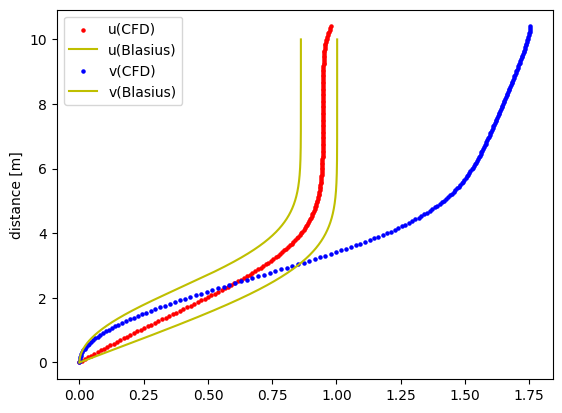

In [11]:
plt.scatter(uv0, eta, s=5, c="r",  label="u(CFD)")
plt.plot(x_array[:,1], Y, c = "y", label = "u(Blasius)")
plt.scatter(vv0, eta, s=5,  c="blue", label="v(CFD)")
plt.plot(Blvv0, Y, c = "y", label = "v(Blasius)")
plt.legend()
plt.ylabel("distance [m]")
plt.legend()

In [12]:
dfu3 = pd.read_csv("out/exp3/u.csv", sep=" ", header=None)
u_array3 = dfu3.to_numpy()

In [13]:
dfv3 = pd.read_csv("out/exp3/v.csv", sep=" ", header=None)
v_array3 = dfv3.to_numpy()

In [14]:
rou0 = 1.225
t0 = 293.0
visc = 1.458e-6 * np.sqrt(t0 ** 3) / (t0 + 110.4)
width = 0.5
v0 = 20.0
re0 = rou0 * v0 * width / visc
blt = width * 5.2 / np.sqrt(re0)
nx = 50000
ny = 200
ymax = blt * 2.0
dy = ymax / float(ny)

In [15]:
y = np.linspace(0, ymax, len(u_array[-1, 1:-5]))
uv03 = u_array3[-1, 1:-5] / v0
eta3 = y * np.sqrt(rou0 * v0 / visc / width)


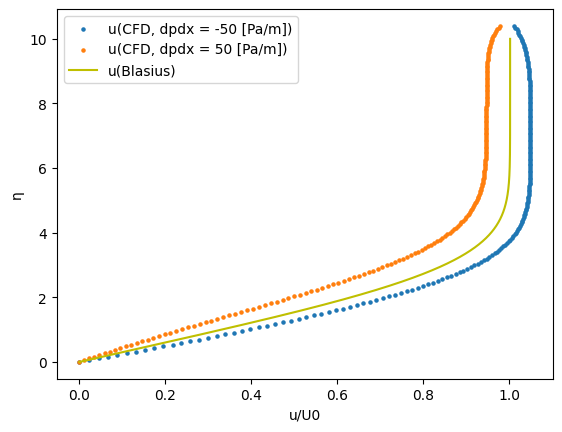

In [16]:
plt.scatter(uv03, eta, s=5,  label="u(CFD, dpdx = -50 [Pa/m])")
plt.scatter(uv0, eta, s=5,  label="u(CFD, dpdx = 50 [Pa/m])")
plt.plot(x_array[:,1], Y, c = "y", label = "u(Blasius)")
plt.legend()
plt.xlabel("u/U0")
plt.ylabel("η")
plt.legend()